LOAN APPROVAL PREDICTION

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

IMPORT LIBRARIES

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

IMPORT DATA

In [3]:
train = pd.read_csv('/Users/meenakshi/Desktop/Datasets/Train_Loan_Home.csv')
test = pd.read_csv('/Users/meenakshi/Desktop/Datasets/Test_Loan_Home.csv')
train_original = train.copy()
test_original = test.copy()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


we have Loan Status as dependent or target variable and rest all are independent variables or predictor.

LOAN STATUS OF APPLICANTS

In [5]:
train["Loan_Status"].value_counts(normalize = True).reset_index()

,index,Loan_Status
0,Y,0.687296
1,N,0.312704


PLOTTING APPROVED  AND DISAPPROVED LOAN STATUS 

<Axes: >

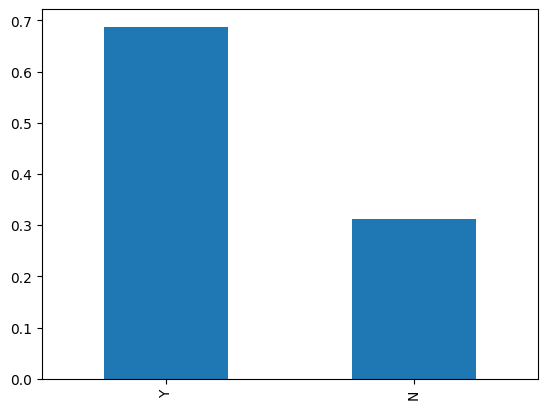

In [6]:
train['Loan_Status'].value_counts(normalize = True).plot.bar()

PLOTTING TARGET VARIABLE VS PREDICTORS

<Axes: title={'center': 'Credit History'}>

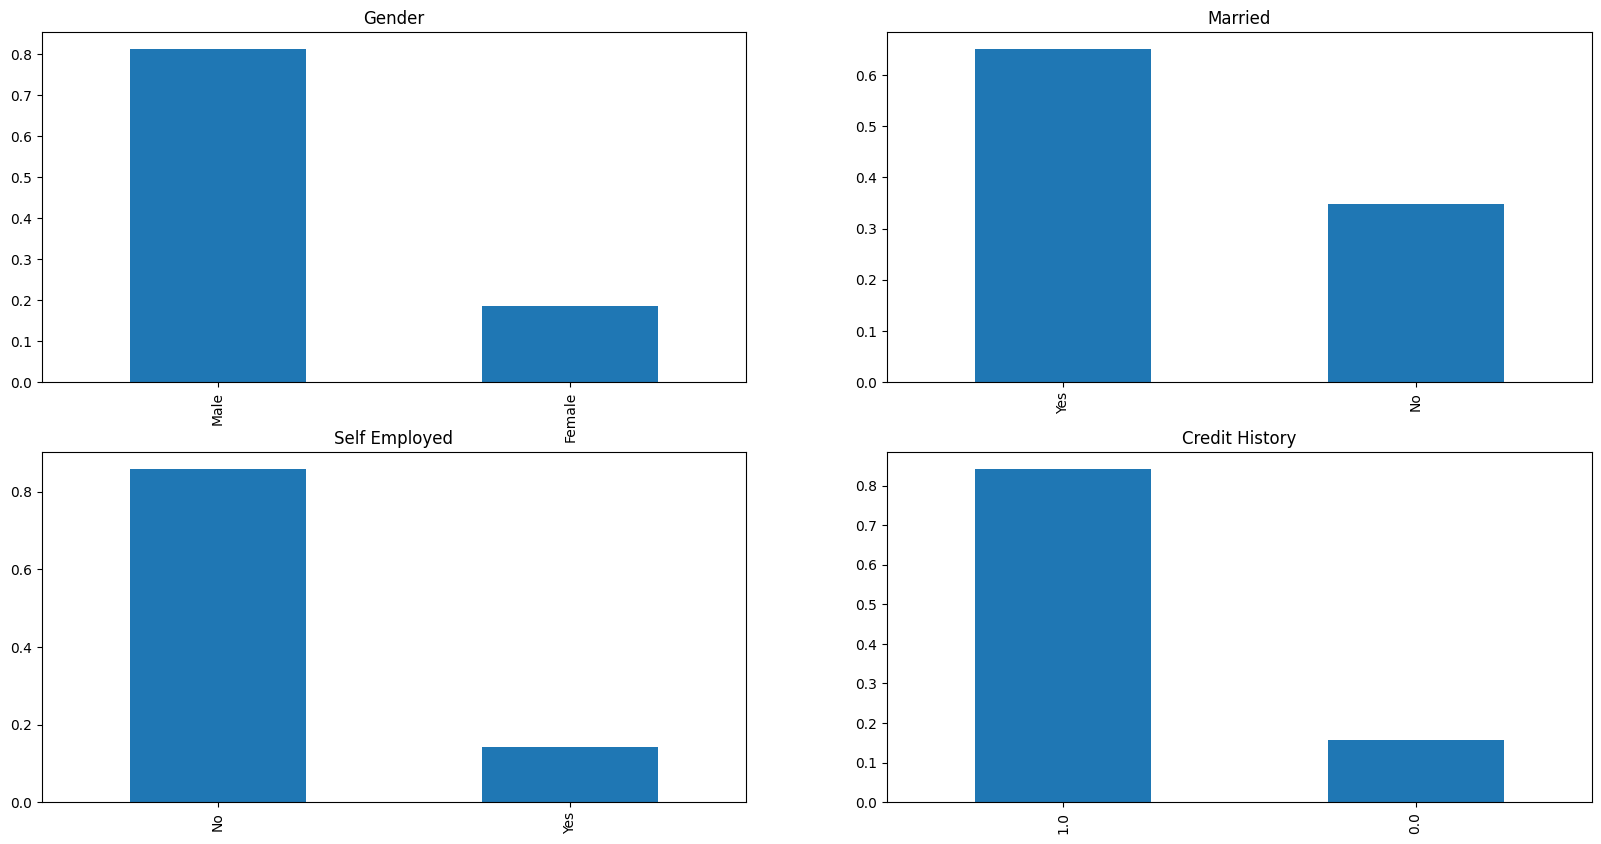

In [7]:
plt.figure(1)
plt.subplot(221) 
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit History')


It can be infered from the plots that -
1. 85% applicants in the database are males.
2. 65% applicants are married
3. Around 15% of the applicants are self employed
4. Around 85% of the applicants have repaid their debts

<Axes: title={'center': 'Property area'}>

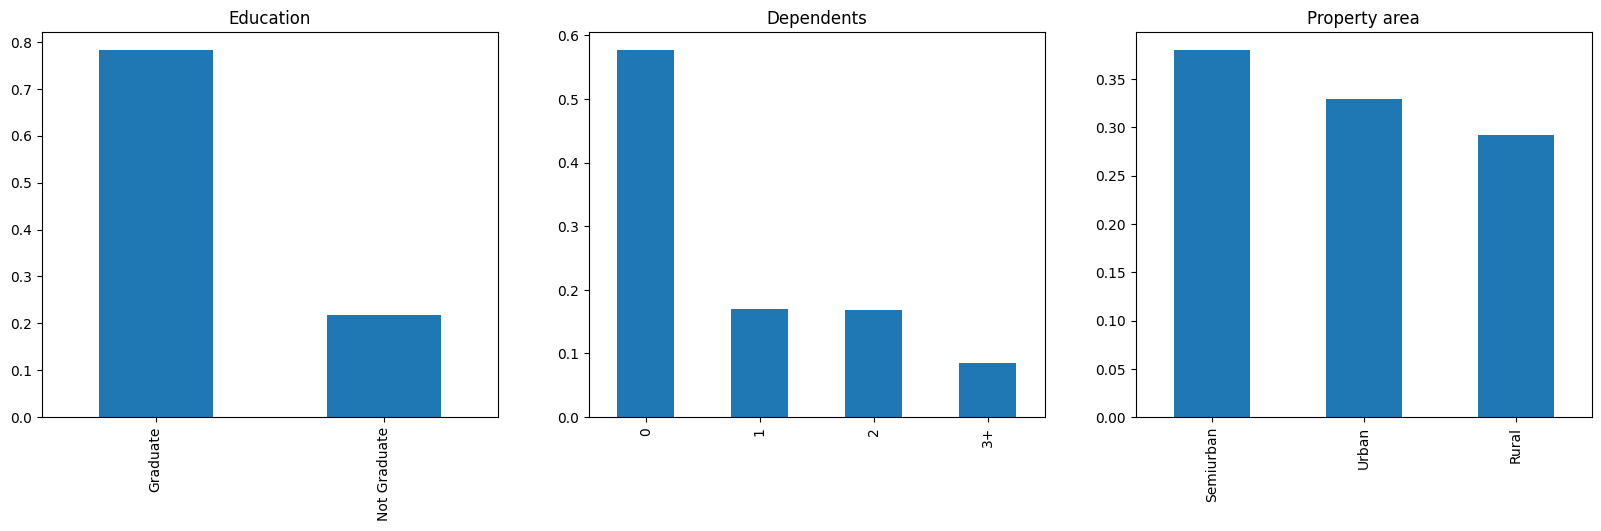

In [8]:
plt.figure(1)
plt.subplot(131) 
train['Education'].value_counts(normalize = True).plot.bar(figsize = (20,5), title = 'Education')
plt.subplot(132)
train['Dependents'].value_counts(normalize = True).plot.bar(title = 'Dependents')
plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property area')

Following can be infered from the plots
1. Around 80% are graduates
2. Most people dont have dependents
3. Most applicants are from semi-urban area

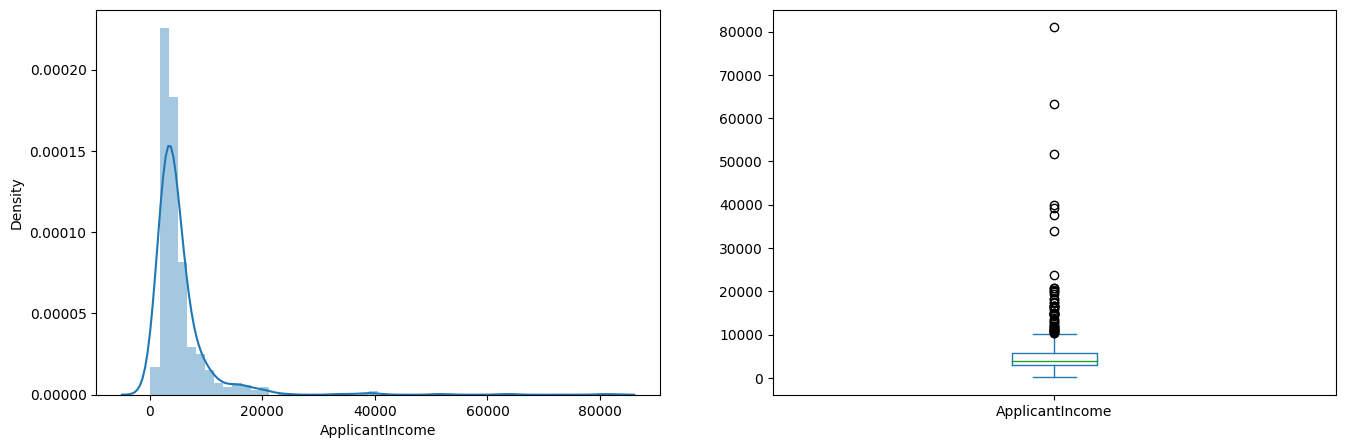

In [9]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (16,5))
plt.show()

It can be infered that most of the data in the distribution is inclined towards the left that means data is not normally distributed. We will try to make it normal at later stage.

The boxplot confirms presence of a number of outliers/ extreme values in the database. This can be attributed to the presence of income disparity in the society. This can also be seen from the point of view that we are looking at people with different level of education level



SEGREGATING INCOME BY LEVEL OF EDUCATION

Text(0.5, 0.98, '')

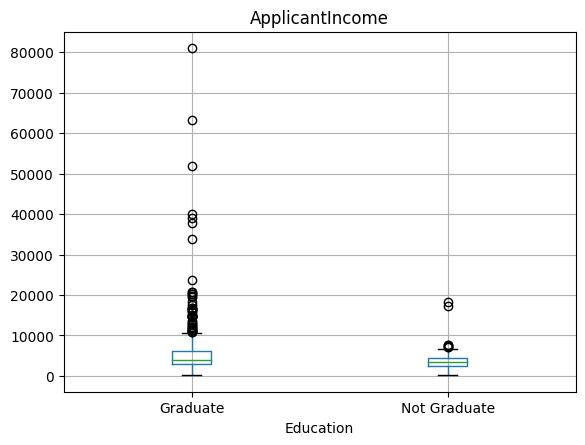

In [10]:
train.boxplot(column = 'ApplicantIncome', by = 'Education') 
plt.suptitle("")

There are a higher number of graduates with very high incomes, which are appearing to be the outliers.

COAPPLICANT INCOME DISTRIBUTION

<Axes: >

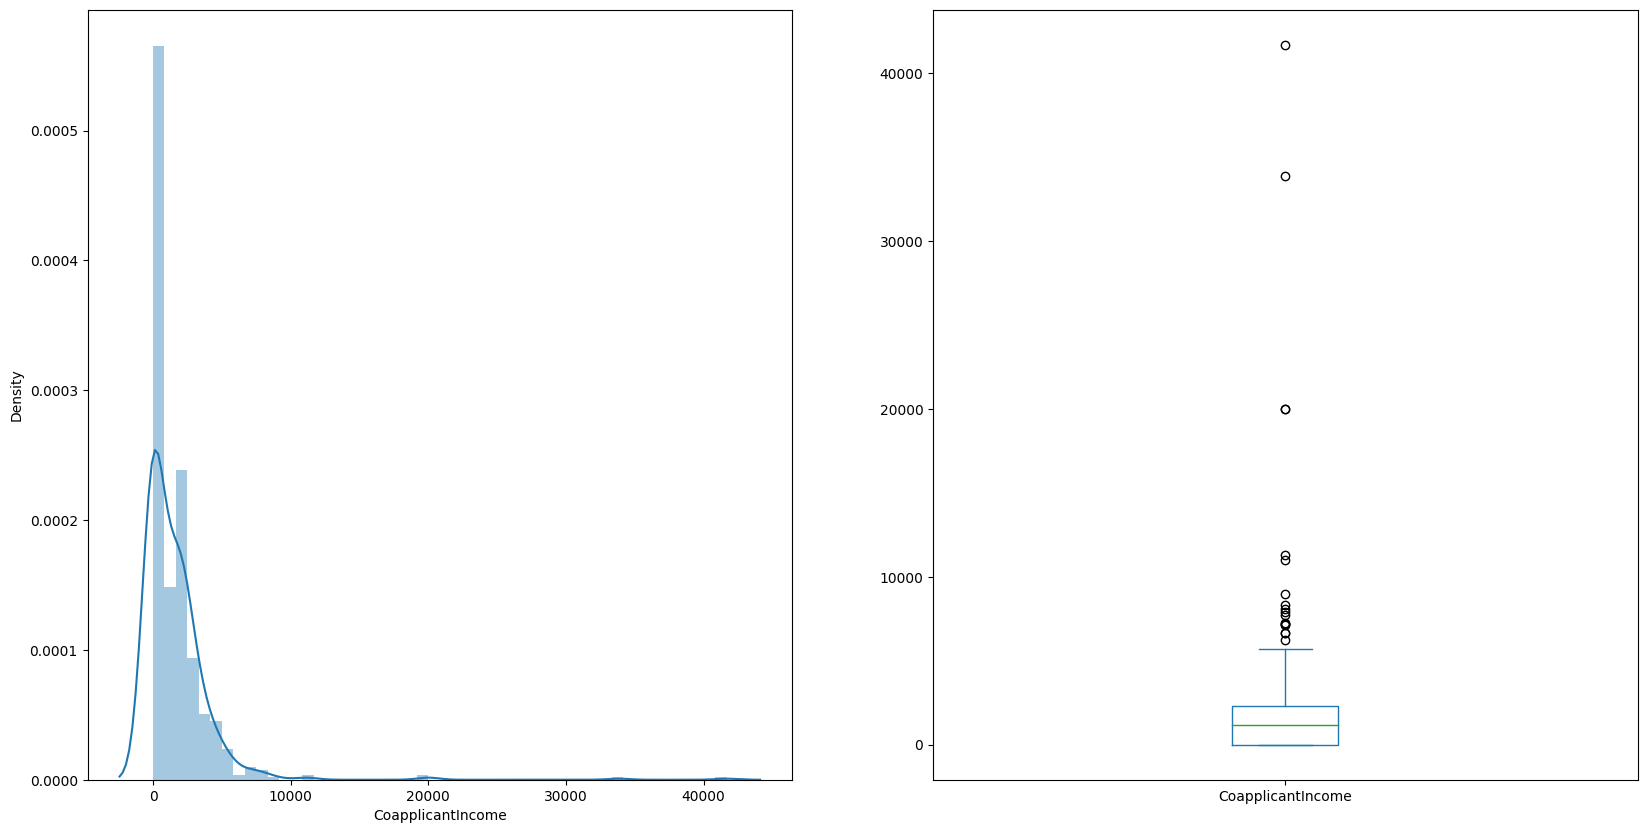

In [11]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize =(20,10))

A similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

DISTRIBUTION OF LOAN AMOUNT VARIABLE

<Axes: >

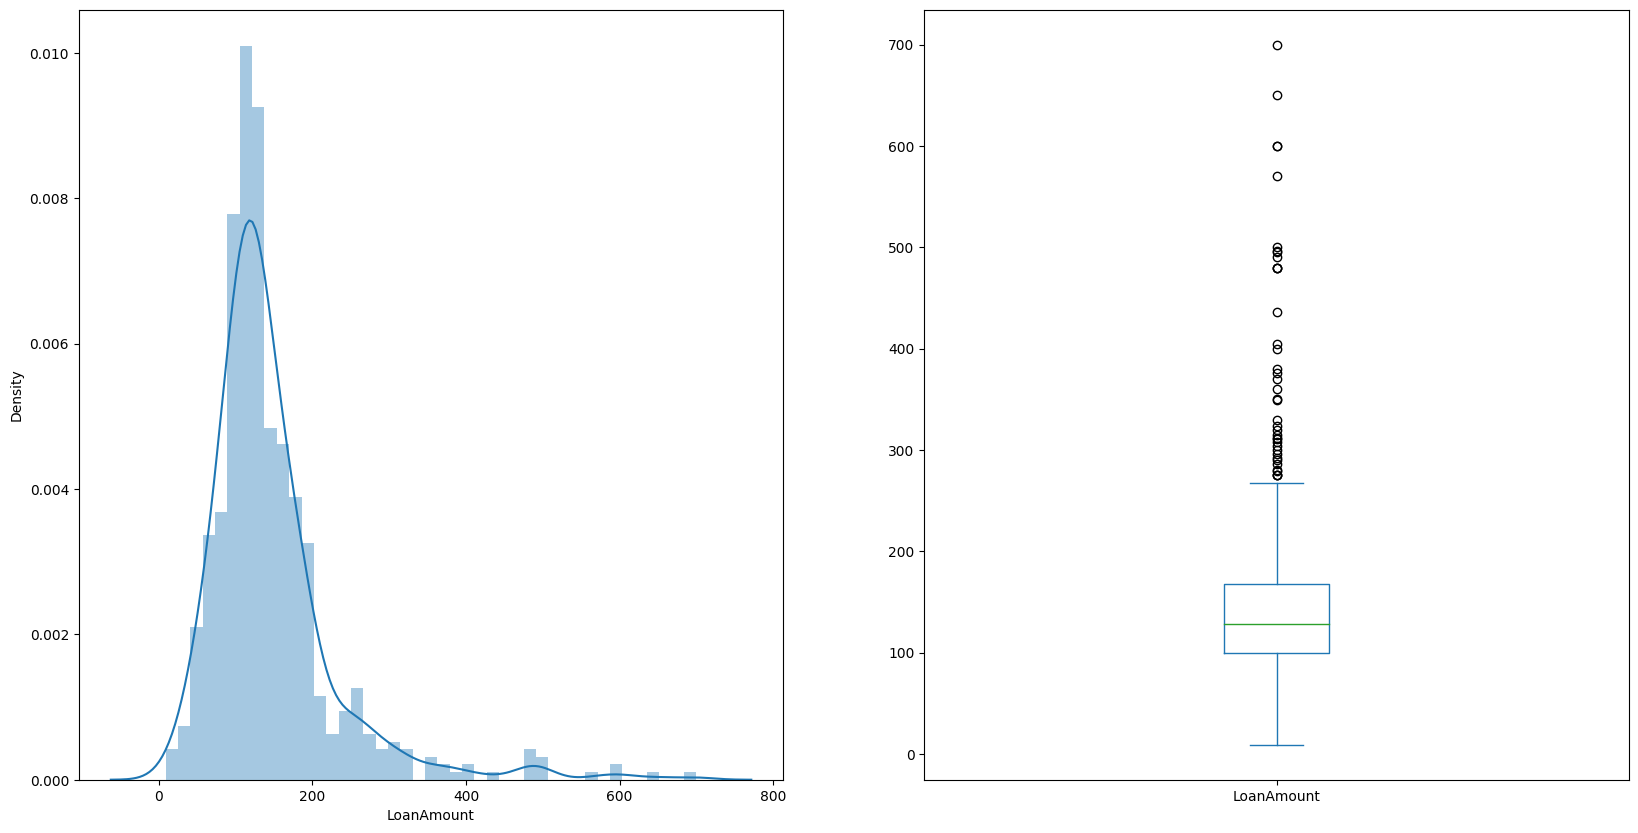

In [12]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize =(20,10))

<Axes: xlabel='Self_Employed'>

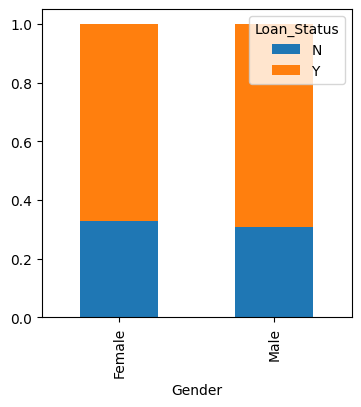

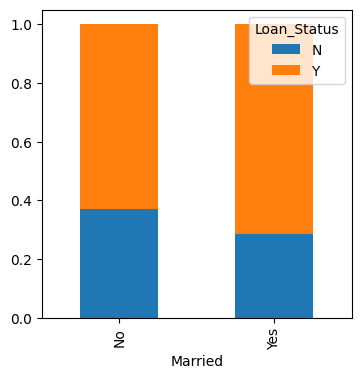

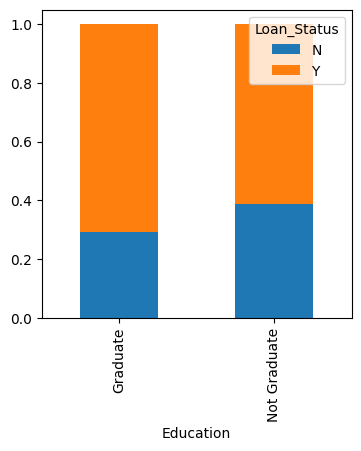

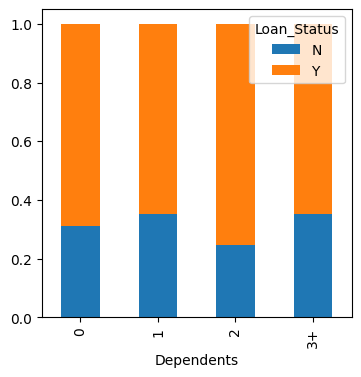

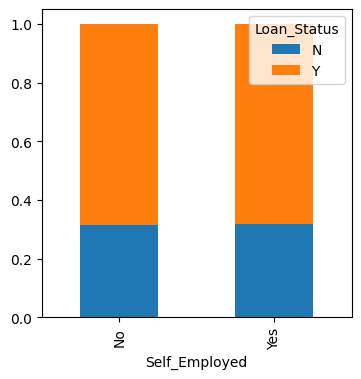

In [13]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = "bar",stacked = True, figsize =(4,4))
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))

* It can be infered that the approval of loan is not determined by gender.
* Proportion of married applicants is higher for the approved loans.
* Proportion of graduate applicants is higher for the approved loans.
* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Text(0, 0.5, 'Percentage')

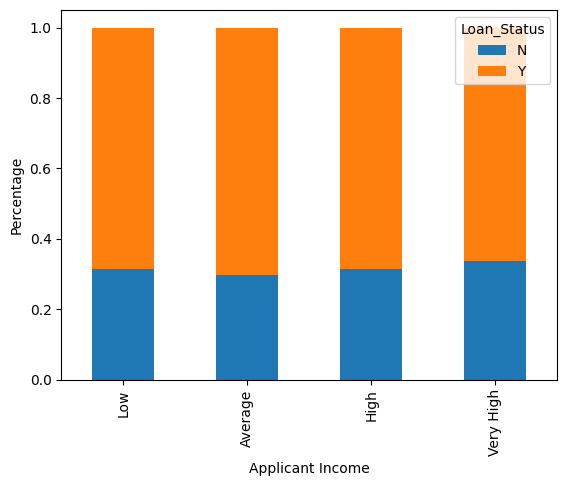

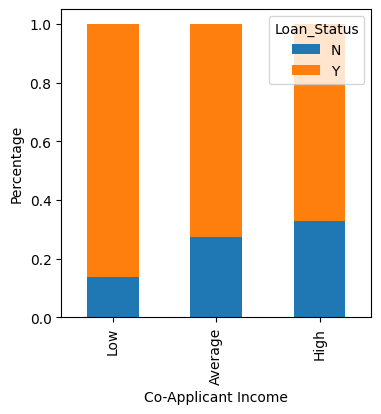

In [14]:
bins = []
bins = [0,2500,4000,6000,81000] 
groups = ['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'], bins, labels = groups)
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True,)
plt.xlabel("Applicant Income")
plt.ylabel("Percentage")
bins = [0,1000,3000,42000] 
groups = ['Low','Average','High']
train['Coapplicant_income_bin']=pd.cut(train['CoapplicantIncome'], bins, labels = groups) 
Coapplicant_Income = pd.crosstab(train['Coapplicant_income_bin'],train['Loan_Status'])
Coapplicant_Income.div(Coapplicant_Income.sum(1).astype(float), axis = 0).plot(kind ="bar", stacked = True, figsize = (4,4))
plt.xlabel("Co-Applicant Income")
plt.ylabel("Percentage")

* Applicant income does not affect the chances of loan approval which contradicts the hypothesis in which I assumed that if the applicant income is high the chances of loan approval will also be high.
*  If coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Text(0, 0.5, 'Percentage')

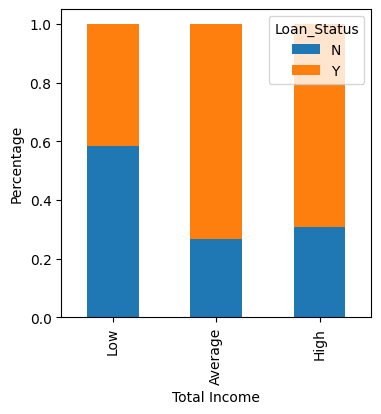

In [15]:
bins = [0,2500,4000,81000] 
groups = ['Low','Average','High']
train['Totalincome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['Total_income_bin']=pd.cut(train['Totalincome'], bins, labels = groups) 
Total_Income = pd.crosstab(train['Total_income_bin'],train['Loan_Status'])
Total_Income.div(Total_Income.sum(1).astype(float), axis = 0).plot(kind ="bar", stacked = True, figsize = (4,4))
plt.xlabel("Total Income")
plt.ylabel("Percentage")

Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

Let's visualize the Loan amount variable

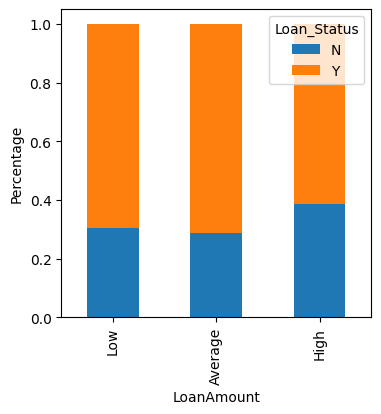

In [16]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize = (4,4)) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

The proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [17]:
train=train.drop(['Income_bin', 'Coapplicant_income_bin', 'LoanAmount_bin', 'Total_income_bin', 'Totalincome'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<Axes: >

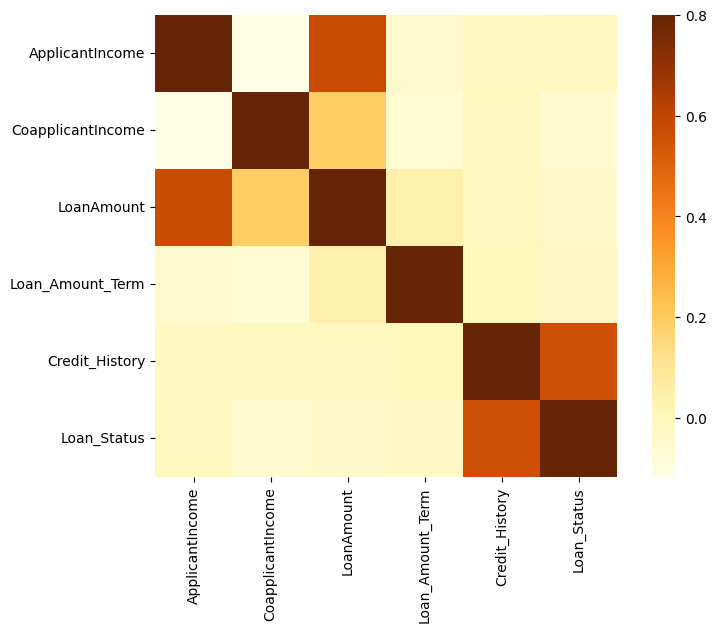

In [18]:
matrix = train.corr()
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix, vmax = .8, cmap = "YlOrBr", square = True)

The most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

MISSING VALUE IMPUTATION

In [19]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [22]:
print("Columns in train DataFrame:")
print(train.columns)

print("Columns in test DataFrame:")
print(test.columns)

Columns in train DataFrame:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Columns in test DataFrame:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncomeMonthly', 'CoapplicantIncomeMonthly',
       'LoanAmountThousands', 'Loan_Amount_Term_Months', 'Credit_History',
       'Property_Area'],
      dtype='object')


In [23]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term_Months'] .fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmountThousands'].fillna(train['LoanAmount'].median(), inplace=True)

In [24]:
test['Loan_Amount_Term_Months'] .fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmountThousands'].fillna(train['LoanAmount'].median(), inplace=True)

In [25]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [26]:
test_copy = test.copy() 
test_copy.rename(columns={'Loan_Amount_Term_Month': 'Loan_Amount_Term',
                          'LoanAmountThosands': 'LoanAmount'}, inplace=True)

In [27]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [28]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)
x_train.head()
x_train.isnull().values.any()

False

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver = 'liblinear') 
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [31]:
y_test_hat = model.predict(x_cv)

In [32]:
Results = pd.DataFrame({'Actual':y_cv,'Predictions':y_test_hat})
Results.head(20)

,Actual,Predictions
350,1,1
248,1,1
139,0,1
30,0,1
338,0,0
194,1,1
517,0,0
514,0,1
540,1,1
113,1,1


In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_cv,y_test_hat))

0.8324324324324325


In [34]:
y_train_hat = model.predict(x_train)

print(accuracy_score(y_train,y_train_hat))

0.8065268065268065


In [35]:
y_test_hat_proba = model.predict_proba(x_cv)

print(y_test_hat_proba.shape)

(185, 2)


In [36]:
y_test_hat_proba[0:5,:]

array([[0.1343321 , 0.8656679 ],
       [0.25541947, 0.74458053],
       [0.31850072, 0.68149928],
       [0.31943229, 0.68056771],
       [0.92264038, 0.07735962]])

In [37]:
# Given array in scientific notation
array_in_scientific = y_test_hat_proba[0:5,:]

# Convert to normal number format
array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)

print(array_in_normal)

[['0.1343320964593695' '0.8656679035406305']
 ['0.2554194733503088' '0.7445805266496912']
 ['0.3185007159985789' '0.6814992840014211']
 ['0.3194322903394347' '0.6805677096605653']
 ['0.9226403761481446' '0.0773596238518554']]


In [38]:
# Compare the predicted values with the actuals along with the predicted probability that the class is "M".

pls = y_test_hat_proba[:,1]

Results = pd.DataFrame({'Actual':y_cv,'Predictions':y_test_hat,'Prob(Class = 2)':pls})

Results.head(20)

,Actual,Predictions,Prob(Class = 2)
350,1,1,0.865668
248,1,1,0.744581
139,0,1,0.681499
30,0,1,0.680568
338,0,0,0.077360
194,1,1,0.619178
517,0,0,0.219225
514,0,1,0.522972
540,1,1,0.888344
113,1,1,0.813648


In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_cv,y_test_hat)

print(cm)

[[ 24  26]
 [  5 130]]


Text(95.72222222222221, 0.5, 'True Label')

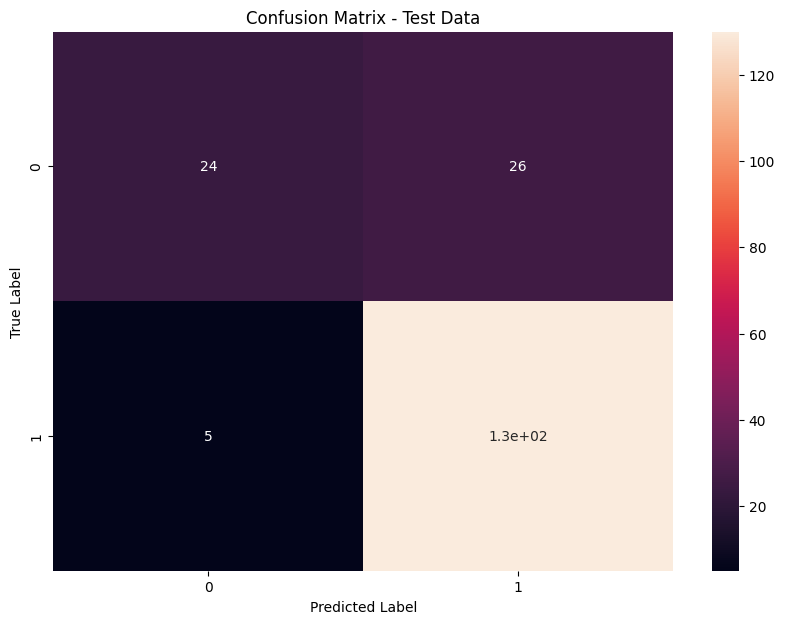

In [40]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [41]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [42]:
def perform(y_pred):
    print("Precision : ", precision_score(y_cv, y_test_hat, average = 'micro'))
    print("Recall : ", recall_score(y_cv, y_test_hat, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_cv, y_test_hat))
    print("F1 Score : ", f1_score(y_cv, y_test_hat, average = 'micro'))
    cm = confusion_matrix(y_cv, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_cv, y_test_hat))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['YES', 'NO'])
    cm.plot()

Precision :  0.8324324324324325
Recall :  0.8324324324324325
Accuracy :  0.8324324324324325
F1 Score :  0.8324324324324325

 [[ 24  26]
 [  5 130]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.83      0.48      0.61        50
           1       0.83      0.96      0.89       135

    accuracy                           0.83       185
   macro avg       0.83      0.72      0.75       185
weighted avg       0.83      0.83      0.82       185

******************************************************



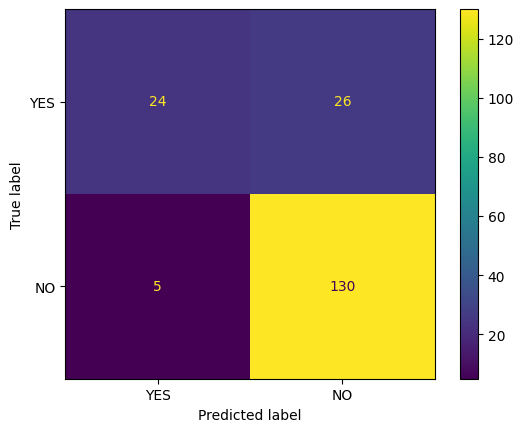

In [43]:
perform(y_test_hat)

Calculate common error metrics for a 2-class classifier

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_cv,y_test_hat))


              precision    recall  f1-score   support

           0       0.83      0.48      0.61        50
           1       0.83      0.96      0.89       135

    accuracy                           0.83       185
   macro avg       0.83      0.72      0.75       185
weighted avg       0.83      0.83      0.82       185

